# E-Commerce_Shipping_Data in Kaggle

이전에, 분류 신경망 빌딩 연습겸 배송이 예상된 시간 내에 도착을 했는지 안했는지 예측하는 모델을 만들어보았다.

이번에는 분류가 아닌 회귀를 이용하여 **고객의 별점**을 예측해보도록 하겠다. 

데이터 출처: https://www.kaggle.com/datasets/prachi13/customer-analytics


In [ ]:
# code for model save and load 

# model.save('cnn_model2.h5')

# from tensorflow.keras.models import load_model
# cnn_model2 = load_model('cnn_model2.h5')

# Data and libraries

일관된 결과를 위해 random seed를 0으로 고정한다.


In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import keras

np.random.seed(0)
tf.random.set_seed(0)

# version check
print("numpy version:", np.__version__)
print("pandas version:", np.__version__)
print("tensorflow version:", tf.__version__)
print("keras version:", keras.__version__)

numpy version: 1.22.4
pandas version: 1.22.4
tensorflow version: 2.9.1
keras version: 2.9.0


In [2]:
# data load

raw_data = pd.read_csv('/Users/Angela/Desktop/Personal/toy1_물류/Train_E-Commerce_Shipping_Data.csv')
raw_data.head(10)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177,3,low,F,44,1233,1
1,2,F,Flight,4,5,216,2,low,M,59,3088,1
2,3,A,Flight,2,2,183,4,low,M,48,3374,1
3,4,B,Flight,3,3,176,4,medium,M,10,1177,1
4,5,C,Flight,2,2,184,3,medium,F,46,2484,1
5,6,F,Flight,3,1,162,3,medium,F,12,1417,1
6,7,D,Flight,3,4,250,3,low,F,3,2371,1
7,8,F,Flight,4,1,233,2,low,F,48,2804,1
8,9,A,Flight,3,4,150,3,low,F,11,1861,1
9,10,B,Flight,3,2,164,3,medium,F,29,1187,1


In [3]:
raw_data.shape

(10999, 12)

In [4]:
raw_data.columns

Index(['ID', 'Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

# predict 'Customer_rating'

##  crop columns
'Customer_rating' prediction에 필요할 것으로 생각되는 컬럼만 남긴다. 

'Warehouse_block', 'Mode_of_Shipment',  'Gender',  'Weight_in_gms' 는 제외하기로 했다.

In [5]:
# dataframe crop

df = raw_data[[ 'Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases',
               'Product_importance', 'Discount_offered', 'Reached.on.Time_Y.N', 
               'Customer_rating']]

In [6]:
df.nunique()

Customer_care_calls      6
Cost_of_the_Product    215
Prior_purchases          8
Product_importance       3
Discount_offered        65
Reached.on.Time_Y.N      2
Customer_rating          5
dtype: int64

## categorial columns processing (one-hot encoding)

Warehouse_block, Mode_of_Shipment, Product_importance

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Customer_care_calls  10999 non-null  int64 
 1   Cost_of_the_Product  10999 non-null  int64 
 2   Prior_purchases      10999 non-null  int64 
 3   Product_importance   10999 non-null  object
 4   Discount_offered     10999 non-null  int64 
 5   Reached.on.Time_Y.N  10999 non-null  int64 
 6   Customer_rating      10999 non-null  int64 
dtypes: int64(6), object(1)
memory usage: 601.6+ KB


# feature and target

Product_importance 는 카테고리형이기 때문에 one-hot인코딩을 진행한다.

In [10]:
df_onehot = pd.get_dummies(data = df, columns = ['Product_importance'], 
                     prefix = ['Product_importance'])
df_onehot.head(10)

,Customer_care_calls,Cost_of_the_Product,Prior_purchases,Discount_offered,Reached.on.Time_Y.N,Customer_rating,Product_importance_high,Product_importance_low,Product_importance_medium
0,4,177,3,44,1,2,0,1,0
1,4,216,2,59,1,5,0,1,0
2,2,183,4,48,1,2,0,1,0
3,3,176,4,10,1,3,0,0,1
4,2,184,3,46,1,2,0,0,1
5,3,162,3,12,1,1,0,0,1
6,3,250,3,3,1,4,0,1,0
7,4,233,2,48,1,1,0,1,0
8,3,150,3,11,1,4,0,1,0
9,3,164,3,29,1,2,0,0,1


In [11]:
df_onehot.columns

Index(['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases',
       'Discount_offered', 'Reached.on.Time_Y.N', 'Customer_rating',
       'Product_importance_high', 'Product_importance_low',
       'Product_importance_medium'],
      dtype='object')

## target data one-hot encoding and then set the X and y

카테고리로 되어있는 데이터들을 원핫인코딩을 진행하기로 했다.

In [12]:
X = df_onehot[['Customer_care_calls', 'Cost_of_the_Product', 'Prior_purchases',
       'Discount_offered', 'Reached.on.Time_Y.N', 'Customer_rating',
       'Product_importance_high', 'Product_importance_low',
       'Product_importance_medium']]
y = df_onehot['Customer_rating']

In [ ]:
# from tensorflow.keras.utils import to_categorical

# y_hot = to_categorical(y)
# print(y_hot)

## feature dimension 

In [13]:
print(X.shape)

(10999, 9)


## target data classes

분류 문제인 것은 맞지만, 가까운 것에 따라서 점수를 매겨야 하며 다섯가지 점수만 존재하며,

4점 이상이라고 해서 5점을 줄 수 없으며, 3점이라고 해서 2점과 많은 차이가 날 것이라고 생각할 수 없는 것이 바로 score rating이다.

두 가지로 진행을 해본다음, 확인을 해봐야 겠다. 먼저 회귀로 예측해본다.

In [14]:
print(set(y))

{1, 2, 3, 4, 5}


# by Regression

## Split Training and Test Data

In [16]:
from sklearn.model_selection import train_test_split

X_tn, X_te, y_tn, y_te = train_test_split(X, y, random_state = 0)

## Building model

In [17]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

In [18]:
from tensorflow.keras.models import Sequential         # 신경망 생성
from tensorflow.keras.layers import Dense              # 신경망 층 추가

n_feat = X_tn.shape[1]              # 신경망에 사용되는 피처 개수 (현재 데이터: 13개)
epo = 30                            # 학습횟수 30. 30단계로 학습 진행

model = Sequential()                # 초기 모형 생성.
model.add(Dense(20, input_dim = n_feat, activation = 'relu')) # add로 입력층 추가, *input_dim = 피처 개수, 20은 output 차원, 활성화 함수를 한 줄에 넣음.
model.add(Dense(1))                 # 최종 아웃풋 층. 회귀문제로 1개의 노드로 출력되도록 한다. 
                                    # 회귀때 최종 활성화 함수를 선형 함수를 사용해야 하는데, 코드에서 지정하지 않으면 선형 함수가 적용된다.

In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 20)                200       
                                                                 
 dense_1 (Dense)             (None, 1)                 21        
                                                                 
Total params: 221
Trainable params: 221
Non-trainable params: 0
_________________________________________________________________


## model compile

In [20]:
model.compile(loss = 'mean_squared_error',         # 손실함수: 회귀 문제이기 때문에 MSE를 사용
              optimizer = 'adam',                  # 옵티마이저와 평가 기준
              metrics = ['mean_squared_error'])

## model learning

In [21]:
hist = model.fit(X_tn, y_tn, epochs = epo, batch_size = 10)  # batch_size: learning mini batch size at one ephoch

Epoch 1/30
825/825 [==============================] - 2s 2ms/step - loss: 7.6409 - mean_squared_error: 7.6409
Epoch 2/30
825/825 [==============================] - 1s 2ms/step - loss: 0.0890 - mean_squared_error: 0.0890
Epoch 3/30
825/825 [==============================] - 1s 2ms/step - loss: 0.0080 - mean_squared_error: 0.0080
Epoch 4/30
825/825 [==============================] - 1s 2ms/step - loss: 0.0033 - mean_squared_error: 0.0033
Epoch 5/30
825/825 [==============================] - 1s 2ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 6/30
825/825 [==============================] - 1s 2ms/step - loss: 0.0019 - mean_squared_error: 0.0019
Epoch 7/30
825/825 [==============================] - 1s 2ms/step - loss: 0.0018 - mean_squared_error: 0.0018
Epoch 8/30
825/825 [==============================] - 1s 2ms/step - loss: 0.0023 - mean_squared_error: 0.0023
Epoch 9/30
825/825 [==============================] - 1s 2ms/step - loss: 0.0021 - mean_squared_error: 0.0021
Epoch 10/3

굉장히 적어보이는데,,, 어느정도가 될지 보겠다.

## evaluation

정확도를 책정해본다.

In [22]:
print(model.evaluate(X_tn, y_tn)[1])
print(model.evaluate(X_te, y_te)[1])

258/258 [==============================] - 1s 1ms/step - loss: 4.3112e-05 - mean_squared_error: 4.3112e-05
4.311179873184301e-05
86/86 [==============================] - 0s 2ms/step - loss: 3.2709e-05 - mean_squared_error: 3.2709e-05
3.270877277827822e-05


딱봐도 좋은 결과는 아닌 것으로 보인다. 물론 만여개 데이터를 합쳐서 에러 제곱의 합이 저정도라면 큰것은 아니지만, 최대값이 5인 상황이라면 ...?

### MSE and loss rate

epoch 별로 그래프를 그리기 쉬워지도록 범위설정하는 arange 함수를 사용한다.

In [23]:
import numpy as np
epoch = np.arange(1, epo +1)               # x축 설정
print(epoch)

[ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30]


In [24]:
mse = hist.history['mean_squared_error']   # 학습시켰던 모형에서 history를 이용하여 데려올 수 있다. 에포크 별 정확도를 알 수 있다.
print(mse)

[7.640883445739746, 0.08903779834508896, 0.007954319939017296, 0.0033221570774912834, 0.0023232251405715942, 0.0019275416852906346, 0.001786840264685452, 0.0022678356617689133, 0.0020693778060376644, 0.003251945599913597, 0.0027678189799189568, 0.005194614641368389, 0.001065667369402945, 0.0045702895149588585, 0.005430626217275858, 0.002674319315701723, 0.0020290371030569077, 0.003718278370797634, 0.001812837435863912, 0.002574205631390214, 0.004065967630594969, 0.004598978441208601, 0.001937388675287366, 0.0014303300995379686, 0.0038659030105918646, 0.002003432484343648, 0.0019216774962842464, 0.0041885897517204285, 0.0027080231811851263, 0.004235510714352131]


In [25]:
loss = hist.history['loss']                # 학습시켰던 모형에서 history를 이용하여 데려올 수 있다. 에포크 별 손실정도를 알 수 있다.
print(loss)

[7.640883445739746, 0.08903779834508896, 0.007954319939017296, 0.0033221570774912834, 0.0023232251405715942, 0.0019275416852906346, 0.001786840264685452, 0.0022678356617689133, 0.0020693778060376644, 0.003251945599913597, 0.0027678189799189568, 0.0051946151070296764, 0.001065667369402945, 0.0045702895149588585, 0.005430626217275858, 0.002674319315701723, 0.0020290371030569077, 0.003718278370797634, 0.001812837435863912, 0.002574205631390214, 0.004065967630594969, 0.004598978441208601, 0.001937388675287366, 0.0014303300995379686, 0.0038659030105918646, 0.002003432484343648, 0.0019216774962842464, 0.0041885897517204285, 0.0027080231811851263, 0.004235510714352131]


## Accuracy and loss rate visualization

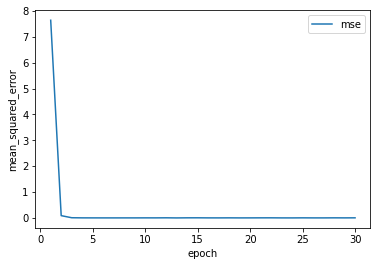

In [26]:
import matplotlib.pyplot as plt

plt.plot(epoch, mse, label = 'mse')
plt.xlabel('epoch')
plt.ylabel('mean_squared_error')
plt.legend()
plt.show()

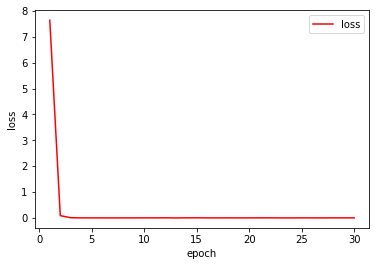

In [27]:
plt.plot(epoch, loss, 'r', label = 'loss')    # plot color = r[ed]
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.show()

In [28]:
# predict 메소드로 테스트 데이터를 넣고 예측값을 구한다. flatten 메소드로 예측값을 펼친다.(DataFrame 만들것)

pred_y = model.predict(X_te).flatten()
print(pred_y)

86/86 [==============================] - 0s 1ms/step
[1.999011  3.9967184 0.999938  ... 0.9986639 1.9992743 5.0024443]


In [44]:
import pandas as pd

# pred_y와 real_val을 한 데이터 프레임에 넣기
res_df = pd.DataFrame(pred_y, columns = ['predict_val'])
res_df['real_val'] = y_te.tolist()             # 그냥 y_te 로 넣었더니 결측값들이 마구잡이로 생기길래 tolist로 해결했다
res_df.head(10)

,predict_val,real_val
0,1.999011,2
1,3.996718,4
2,0.999938,1
3,1.007453,1
4,1.999526,2
5,1.001639,1
6,4.995231,5
7,1.998260,2
8,5.000285,5
9,2.999560,3


In [45]:
# 예쁘게 시각화를 위해 오름차순 되도록 해둔다.

df_sort = res_df.sort_values(['predict_val'], ascending = True)
df_sort.head(3)

,predict_val,real_val
894,0.885377,1
2330,0.898084,1
2404,0.900142,1


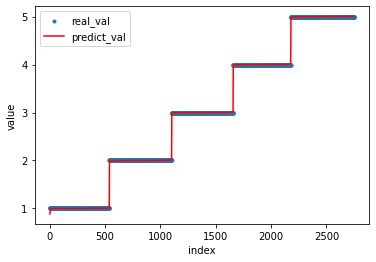

In [46]:
import matplotlib.pyplot as plt
import numpy as np

idx = np.arange(1, len(df_sort)+1)    # x축 생성
plt.scatter(idx, df_sort['real_val'], marker = '.', label = 'real_val')
plt.plot(idx, df_sort['predict_val'], color = 'r', label = 'predict_val')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

상당히 괜찮은 점수가 나온 것으로 보이는데, 예상치를 반올림하여 보면 어떨까?

## round the predicted values

반올림을 하고자 하는데, 두번째 자리까지 표시를 한 후, 첫 번째 자리를 표시하도록 한다. 그리고 마지막 점수를 다시 한번 반올림하도록 했다.

한번에 반올림을 하는 것보다 조금 더 가까운 점수에 도달하도록 하고자 했다.

In [53]:
res_df['rounded'] = res_df['predict_val'].round(2).round(1).round(0).astype('int')
res_df

,predict_val,real_val,rounded
0,1.999011,2,2
1,3.996718,4,4
2,0.999938,1,1
3,1.007453,1,1
4,1.999526,2,2
...,...,...,...
2745,1.997333,2,2
2746,1.995666,2,2
2747,0.998664,1,1
2748,1.999274,2,2


In [54]:
res_df['rounded'].nunique()

5

### results after rounding : 100..?

In [63]:
res_df[res_df['real_val'] == res_df['rounded']]['rounded'].count() / res_df.shape[0] * 100

100.0

세상에나... 정확도 백퍼센트면 과적합아닐까요

In [64]:
df_sort = res_df.sort_values(['predict_val'], ascending = True)
df_sort.head(3)

,predict_val,real_val,rounded
894,0.885377,1,1
2330,0.898084,1,1
2404,0.900142,1,1


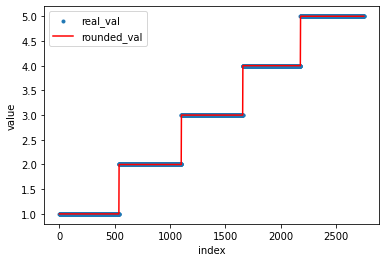

In [65]:
idx = np.arange(1, len(df_sort)+1)    # x축 생성
plt.scatter(idx, df_sort['real_val'], marker = '.', label = 'real_val')
plt.plot(idx, df_sort['rounded'], color = 'r', label = 'rounded_val')
plt.xlabel('index')
plt.ylabel('value')
plt.legend()
plt.show()

# ver2. (Whole code)

one-hot 인코딩을 통해 이번엔 타겟을 카테고리얼하게 바꾸었다.

In [76]:
y

0        2
1        5
2        2
3        3
4        2
        ..
10994    1
10995    1
10996    4
10997    2
10998    5
Name: Customer_rating, Length: 10999, dtype: int64

In [79]:
from tensorflow.keras.utils import to_categorical

y_hot = to_categorical(y, num_classes = 6, dtype = 'int64')
print(y_hot)

[[0 0 1 0 0 0]
 [0 0 0 0 0 1]
 [0 0 1 0 0 0]
 ...
 [0 0 0 0 1 0]
 [0 0 1 0 0 0]
 [0 0 0 0 0 1]]


### 에러 해결

죽어도 num_classes = 5로 되지 않아서 현재 y_hot의 일부를 지우고 시작하려 한다.

In [89]:
y_hot_modi = np.delete(y_hot, 0, axis = 1)
y_hot_modi

array([[0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1],
       [0, 1, 0, 0, 0],
       ...,
       [0, 0, 0, 1, 0],
       [0, 1, 0, 0, 0],
       [0, 0, 0, 0, 1]])

In [90]:
# checking the feature dimension and target data
print("-- X and target shape checking --")
print(X.shape)
print(set(y))

-- X and target shape checking --
(10999, 9)
{1, 2, 3, 4, 5}


In [91]:
# split Training and Test Data
from sklearn.model_selection import train_test_split
X_tn, X_te, y_tn, y_te = train_test_split(X, y_hot_modi, random_state = 0)

-- model summary --
Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 20)                200       
                                                                 
 batch_normalization_2 (Batc  (None, 20)               80        
 hNormalization)                                                 
                                                                 
 activation_4 (Activation)   (None, 20)                0         
                                                                 
 dense_7 (Dense)             (None, 5)                 105       
                                                                 
 activation_5 (Activation)   (None, 5)                 0         
                                                                 
Total params: 385
Trainable params: 345
Non-trainable params: 40
___________________________________

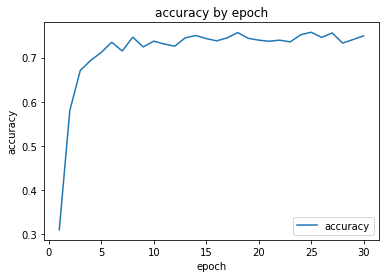

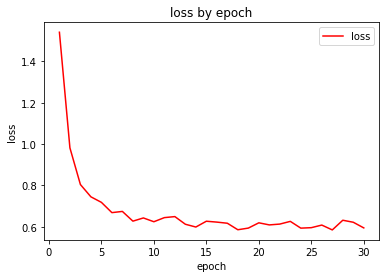

In [92]:
# building model
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

from tensorflow.keras.models import Sequential         # 신경망 생성
from tensorflow.keras.layers import Dense              # 신경망 층 추가
from tensorflow.keras.layers import BatchNormalization # 배치 정규화
from tensorflow.keras.layers import Activation         # 활성화 함수 사용

n_feat = X_tn.shape[1]              # 신경망에 사용되는 피처 개수 (현재 데이터: 9개)
n_class = len(set(y))               # 클래스 개수 (현재 데이터: 5개)
epo = 30                            # 학습횟수 30. 30단계로 학습 진행

model = Sequential()                # 초기 모형 생성.
model.add(Dense(20, input_dim = n_feat)) # add로 입력층 추가, *input_dim = 피처개수, 20은 output 차원
model.add(BatchNormalization())     # 배치 정규화
model.add(Activation('relu'))       # 활성화 함수 reLU
model.add(Dense(n_class))           # 최종 아웃풋 층. 클래스 개수인 5개로 구분되도록.
model.add(Activation('softmax'))    # 활성화 함수 softmax

# model checking
print("-- model summary --")
model.summary()

# compile
model.compile(loss = 'categorical_crossentropy',  # 손실함수: 이진은 binary, 이상은 categorical
             optimizer = 'adam',                  # 옵티마이저와 평가 기준
             metrics = ['accuracy'])


# learning
hist = model.fit(X_tn, y_tn, epochs = epo, batch_size = 10)  # batch_size: learning mini batch size at one ephoch

# evaluation
print("-- model evaluate with train data --")
print(model.evaluate(X_tn, y_tn)[1])
print("-- model evaluate with test data --")
print(model.evaluate(X_te, y_te)[1])

# accuracy
import numpy as np
epoch = np.arange(1, epo +1)          # aragne 함수로 x축 설정
# print(epoch)
accuracy = hist.history['accuracy']   # 학습시켰던 모형에서 history를 이용하여 데려올 수 있다. 에포크 별 정확도를 알 수 있다.
print("Accuracy :", accuracy)
loss = hist.history['loss']           # 학습시켰던 모형에서 history를 이용하여 데려올 수 있다. 에포크 별 손실정도를 알 수 있다.
print("Loss :", loss)

# visualization

import matplotlib.pyplot as plt

plt.plot(epoch, accuracy, label = 'accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.title("accuracy by epoch")
plt.show()

plt.plot(epoch, loss, 'r', label = 'loss')    # plot color = r[ed]
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.title("loss by epoch")
plt.show()

### Commentary

결국 정확도를 1을 찍고 말았다. 이게 좋다고 할수만은 없지만... 또 나쁘다고만은 할 수 없으니까 말이다.

다른 평점과 관련된 데이터인 Olist Ecommerce data로도 해보아야겠다는 생각이 들었다! (진부해서 하고싶지 않았는데 학습차 하긴 해야겠다.)